# Data Preprocessing

In [439]:
import re
from math import sqrt

In [440]:
x = open('feature_name_original.txt' , 'r')
# open feature name file and extract them.
# file has every feature name even i had removed, i just remove '@' characteristic from them.
# then using module regex to find meaningful variables.
feature_names = []
for line in x :
    pattern = re.compile(r'(@attribute) ([\S]+)')
    tmp = re.search(pattern, line)
    if (tmp) != None :
        feature_names.append(tmp.group(2))
print(feature_names)
len(feature_names)
# meaningful variable is 103 because first 5 var(communityname~fold) is non-predictive so I don't use them.

['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'AsianPerCap', 'otherPerCap', 'HispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLa

108

In [441]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [442]:
book = xlrd.open_workbook('data_original.xlsx')
sheet = book.sheet_by_index(0)
#start of 5 because i dont' use first 5 data(above mention it)
feature_index = [i for i in range(5,len(feature_names))]
data = []
for i in range(1, sheet.nrows):
    tmp = []
    for idx in feature_index:
        x = sheet.row_values(i)[idx]
        tmp.append(0 if x =='?' else x) # exception handling for independent variables. this data set just 1 instances founded. 
    # In very little case, dependent variables which we want to estimate has missing value
    # So I except that cases
    if(sheet.row_values(i)[len(feature_names)-1] != '?' and sheet.row_values(i)[len(feature_names)-2] != '?' ) :
        data.append(tmp)
#print(data)


In [443]:
# this dataframe hold every attributes
# 108 - 5(nonpredictive) -1(sum as crime per pop) = 102

df = pd.DataFrame(data, columns=feature_names[5:])
df['crimePerPop'] = df['violentPerPop'] + df['nonViolPerPop']
df = df.drop(['violentPerPop', 'nonViolPerPop'], axis = 1)
len(df.columns)

102

# if you re - running code, starting from here
# and sometimes you have to delete dataframe using underline

In [ ]:
#del df2, df3

## Test using new features

In [444]:
#df3 holds new feature
#df2 is just temporal.
df2 = pd.DataFrame()
df3 = pd.DataFrame()

############ Make Feature ####################################################
############ Feature 2 #######################################################
df3["HomelessPct"] = (df['persEmergShelt']+df['persHomeless'])/df['pop']

##############################################################################
############ Feature 2 #######################################################
df2["whiteIncFactor"] = df["whitePerCap"] / df["perCapInc"]
df2["blackIncFactor"] = df["blackPerCap"] / df["perCapInc"]
df2["AsianIncFactor"] = df["AsianPerCap"] / df["perCapInc"]
df2["HispIncFactor"] = df["HispPerCap"] / df["perCapInc"]
df2["whiteCommInc"] = (df2["whiteIncFactor"] * df["pctWhite"])
df2["BlackCommInc"] = (df2["blackIncFactor"] * df["pctBlack"])
df2["AsianCommInc"] = (df2["AsianIncFactor"] * df["pctAsian"])
df2["HispCommInc"] = (df2["HispIncFactor"] * df["pctHisp"])
df2["TotalCommInc"] = df2["whiteCommInc"] + df2["BlackCommInc"] + df2["AsianCommInc"] + df2["HispCommInc"] 


df2["whiteComm"] = df2["whiteCommInc"] / df2["TotalCommInc"]
df2["blackComm"] = df2["BlackCommInc"] / df2["TotalCommInc"]
df2["AsianComm"] = df2["AsianCommInc"] / df2["TotalCommInc"]
df2["HispComm"] = df2["HispCommInc"] / df2["TotalCommInc"]
df3["economicGapPerRace"] = abs(df2["whiteComm"]-df2["blackComm"]) + abs(df2["whiteComm"]-df2["AsianComm"])+ \
                abs(df2["whiteComm"]-df2["HispComm"])+abs(df2["blackComm"]-df2["AsianComm"])+ abs(df2["blackComm"]-df2["HispComm"]) + abs(df2["AsianComm"]-df2["HispComm"])
##############################################################################
############ Feature 3 #######################################################
df3["HousingCostPerInc"] = (df['medRentpctHousInc']+df['medOwnCostpct']+df['medOwnCostPctWO'])/3

#df3 check
a = list(df3.columns)
a

['HomelessPct', 'economicGapPerRace', 'HousingCostPerInc']

In [445]:
# drop variables used as making new feature
df4 = pd.DataFrame()
df4 = df.drop(['pctWhite','pctBlack','pctAsian','pctHisp','perCapInc','whitePerCap', 'blackPerCap','AsianPerCap','HispPerCap',
               'persEmergShelt','persHomeless',
               'medRentpctHousInc', 'medOwnCostpct', 'medOwnCostPctWO'], axis = 1) # total 16
# -14 + 3 => -11 variables
# this is Step1. Drop improper data which is duplicate or unrelated in my perspective
df4 = df4.drop([ 'persUrban', 'persPoverty','houseVacant', 
                'persPerFam', 'kidsBornNevrMarr','numForeignBorn', 'medNumBedrm' ,'medYrHousBuilt', 'landArea'], axis = 1)
# -9 variables
# totally, 102 - 20 => 82 variables 
df4 = pd.concat([df3,df4],axis=1)
len(df4.columns)

82

In [446]:
X = df4[list(df4.columns)[0:-1]]
y = df4[list(df4.columns)[-1:]]

# scaler for normalization
X_norm = MinMaxScaler().fit_transform(X)
y_norm = MinMaxScaler().fit_transform(y)

# cross validation for prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1331, 81)
(571, 81)


# LinearRegression Part

In [447]:
model = LR(fit_intercept=True, normalize=True, n_jobs=None)
model.fit(X_train, y_train)

p = len(df4.columns) - 1 # number of features
n = len(data) # number of sample
accuracy = model.score(X_test, y_test)
train_accuracy = model.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
model.coef_

train R2_score    : 0.6321400058908914
train adj R2_score: 0.6157682149442771
test R2_score    : 0.6326646804277984
test adj R2_score: 0.6163162403809037


array([[ 1.05652964e-01, -4.17978054e-02, -4.78845807e-02,
         5.53732090e-02, -2.38318322e-01,  1.83332397e-01,
        -6.08441558e-02, -1.57457497e-01,  2.17641475e-01,
         1.48492072e-02, -2.12646318e-01,  7.06873365e-02,
        -2.64072509e-03,  2.01105995e-02,  2.77139839e-01,
         1.07357790e-02, -1.18202507e-01,  2.05137208e-01,
         2.16488459e-02,  5.89836478e-02,  1.21319423e-01,
        -8.94901391e-03, -1.47831525e-01, -3.00249677e-02,
         6.33554491e-03,  1.70983941e-01, -4.33781826e-02,
        -6.06398484e-02,  2.60454091e-02,  1.02447368e-01,
         3.52424895e-01,  2.39749315e-01,  3.01057315e-01,
        -3.73829200e-01,  1.81202134e-01, -3.05543480e-01,
         3.75948042e-02, -7.86367813e-03, -3.99440871e-03,
        -6.04738268e-02,  1.40140590e-01,  4.17841550e-02,
        -1.06633658e-01,  5.74604534e-02,  3.79857306e-02,
        -1.84915724e-01,  2.39230116e-01, -3.31344254e-01,
         4.35937139e-02, -2.96916875e-02, -5.15650905e-0

In [448]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,model.coef_[0]),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['HomelessPct', 'economicGapPerRace', 'HousingCostPerInc', 'pop',
       'perHoush', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban',
       'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec',
       'pctPubAsst', 'pctRetire', 'medFamIncome', 'NAperCap', 'otherPerCap',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu',
       'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc',
       'pctAllDivorc', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par',
       'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'pctKidsBornNevrMarr',
       'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10',
       'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10',
       'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous',
       'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup',
       'pctPersOwnOccup', 'pctPopDenseHous', '

,features,coefficients
67,ownHousUperQ,1.529012e+11
69,rentLowQ,1.489499e+11
72,rentQrange,1.326017e+11
60,pctHousOwnerOccup,9.471330e-01
30,pctMaleDivorc,3.524249e-01
74,pctForeignBorn,3.019367e-01
32,pctFemDivorc,3.010573e-01
14,pctWsocsec,2.771398e-01
53,persPerOccupHous,2.767252e-01
31,pctMaleNevMar,2.397493e-01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

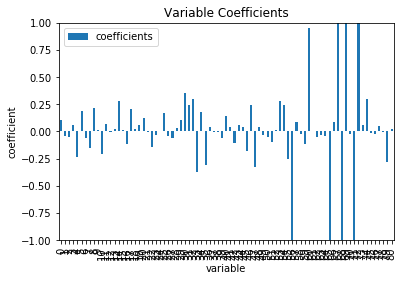

In [449]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.06006059798419823


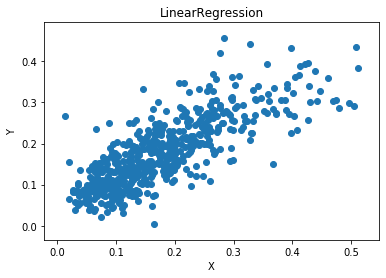

In [450]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LinearRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)

# RidgeRegression Part

In [451]:
from sklearn.linear_model import Ridge
rR = Ridge(alpha=0.01, normalize=True)
rR.fit(X_train, y_train)

p = len(df4.columns) - 1 # number of features
n = len(data) # number of sample

accuracy = rR.score(X_test, y_test)
train_accuracy = rR.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
rR.coef_

train R2_score    : 0.6253286276251452
train adj R2_score: 0.6086536929205499
test R2_score    : 0.6333930719860941
test adj R2_score: 0.617077049365695


array([[ 0.11060936, -0.05270605, -0.03921207,  0.05503306, -0.1631051 ,
         0.06481377, -0.1084722 ,  0.01764984,  0.15940911,  0.01581824,
         0.00598668,  0.04164446, -0.00815978,  0.01162356,  0.1937903 ,
         0.00629572, -0.11755043,  0.01146972,  0.02425105,  0.07152247,
         0.10902926, -0.05610321, -0.07121088, -0.01033056, -0.00384008,
         0.13626648, -0.04378764, -0.06119475,  0.01008243,  0.07219776,
         0.11785224,  0.16987298,  0.02429161,  0.0352238 ,  0.01522099,
        -0.15097895,  0.02433586, -0.01823639, -0.01597561, -0.04440645,
         0.13127999,  0.02199235, -0.06552451,  0.01678435,  0.04965928,
        -0.06399636, -0.01647687, -0.08041643, -0.01040088, -0.02631493,
        -0.00865728, -0.00798026, -0.01506598,  0.26070762, -0.08067979,
        -0.01907429, -0.10975238,  0.06134729, -0.02261515, -0.11221937,
         0.07295396,  0.00609266, -0.04885393, -0.01658571, -0.0409155 ,
        -0.03209517,  0.01537188, -0.02009809, -0.0

In [431]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,rR.coef_[0]),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['HomelessPct', 'economicGapPerRace', 'HousingCostPerInc', 'pop',
       'perHoush', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban',
       'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec',
       'pctPubAsst', 'pctRetire', 'medFamIncome', 'NAperCap', 'otherPerCap',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu',
       'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc',
       'pctAllDivorc', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par',
       'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'pctKidsBornNevrMarr',
       'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10',
       'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10',
       'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous',
       'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup',
       'pctPersOwnOccup', 'pctPopDenseHous', '

,features,coefficients
53,persPerOccupHous,0.260708
74,pctForeignBorn,0.213010
14,pctWsocsec,0.193790
31,pctMaleNevMar,0.169873
8,pct65up,0.159409
25,pctEmploy,0.136266
40,pctKidsBornNevrMarr,0.131280
30,pctMaleDivorc,0.117852
0,HomelessPct,0.110609
20,pctPoverty,0.109029


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

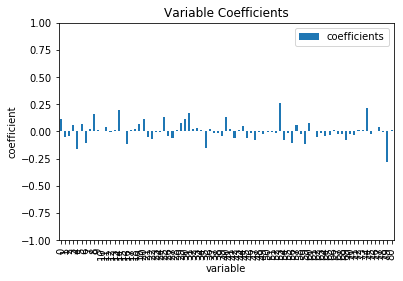

In [432]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.060001021163485414


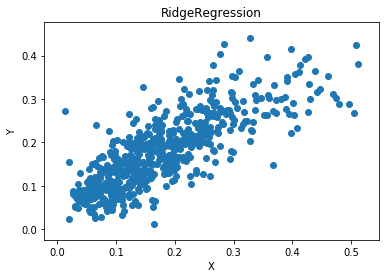

In [433]:
y_pred = rR.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("RidgeRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)

# LassoRegression part

In [438]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha=0.00001, normalize=True)
lassoR.fit(X_train, y_train)
p = len(df4.columns) - 1 # number of features
n = len(data) # number of sample
accuracy = lassoR.score(X_test, y_test)
train_accuracy = lassoR.score(X_train, y_train)
train_adj_r =  1- (1-train_accuracy)*(n-1)/(n-p-1)
adj_r = 1- (1-accuracy)*(n-1)/(n-p-1)  # adjusted r2 score 
print("train R2_score    :", str(train_accuracy))
print("train adj R2_score:", train_adj_r)
print("test R2_score    :", str(accuracy))
print("test adj R2_score:", adj_r)
lassoR.coef_

train R2_score    : 0.6191633652506568
train adj R2_score: 0.6022140424953288
test R2_score    : 0.6360923072019926
test adj R2_score: 0.6198964153796638


array([ 0.11012395, -0.04791522, -0.044325  ,  0.04984335, -0.112129  ,
        0.        , -0.01683844,  0.        ,  0.11095479,  0.01732725,
        0.        ,  0.        , -0.00526426,  0.        ,  0.14813576,
       -0.        , -0.10311713,  0.        ,  0.01242064,  0.06602881,
        0.09838785, -0.03732182, -0.06723464,  0.        , -0.        ,
        0.12333962, -0.04340496, -0.04503327, -0.        ,  0.04935883,
        0.12451001,  0.10950199,  0.02104777,  0.        , -0.        ,
       -0.17409851,  0.        , -0.01055156, -0.01831301, -0.03657317,
        0.11012711,  0.        , -0.02616169,  0.        ,  0.04159405,
       -0.05055729, -0.        , -0.07298292, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.15006665, -0.04853222,
        0.        , -0.        ,  0.03227218, -0.00998957, -0.10391148,
        0.        ,  0.00629307, -0.04580553, -0.        , -0.03292826,
       -0.        , -0.        , -0.02508389, -0.00619796, -0.09

In [435]:
print(X.columns)
coefs = pd.DataFrame(zip(X.columns,lassoR.coef_),columns=['features','coefficients'])
coefs.reindex(coefs.coefficients.sort_values(ascending=False).index)

Index(['HomelessPct', 'economicGapPerRace', 'HousingCostPerInc', 'pop',
       'perHoush', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban',
       'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec',
       'pctPubAsst', 'pctRetire', 'medFamIncome', 'NAperCap', 'otherPerCap',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu',
       'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc',
       'pctAllDivorc', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par',
       'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'pctKidsBornNevrMarr',
       'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10',
       'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10',
       'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous',
       'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup',
       'pctPersOwnOccup', 'pctPopDenseHous', '

,features,coefficients
0,HomelessPct,0.092731
33,pctAllDivorc,0.067461
40,pctKidsBornNevrMarr,0.058339
20,pctPoverty,0.056495
30,pctMaleDivorc,0.050231
9,pctUrban,0.016317
23,pctCollGrad,0.000000
24,pctUnemploy,0.000000
25,pctEmploy,-0.000000
27,pctEmployProfServ,-0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

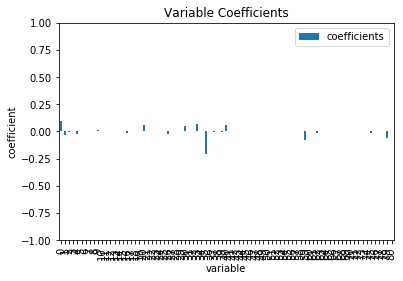

In [436]:
coefs.plot(kind='bar', title ='Variable Coefficients')
plt.xlabel('variable')
plt.ylabel('coefficient')
plt.ylim(-1,1)
plt.xticks(rotation=90)

0.0619834013106102


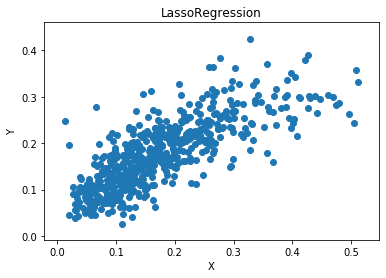

In [437]:
y_pred = lassoR.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LassoRegression")
rmse = sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(rmse)